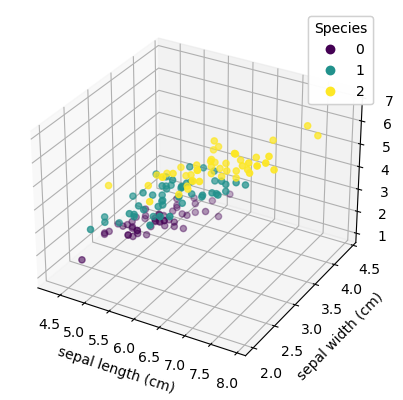

In [2]:
#Task 1
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :3]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris.target)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
legend = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend)
plt.show()


Breast Cancer Dataset Accuracy: 0.9300699300699301
Wine Dataset Accuracy: 0.7555555555555555


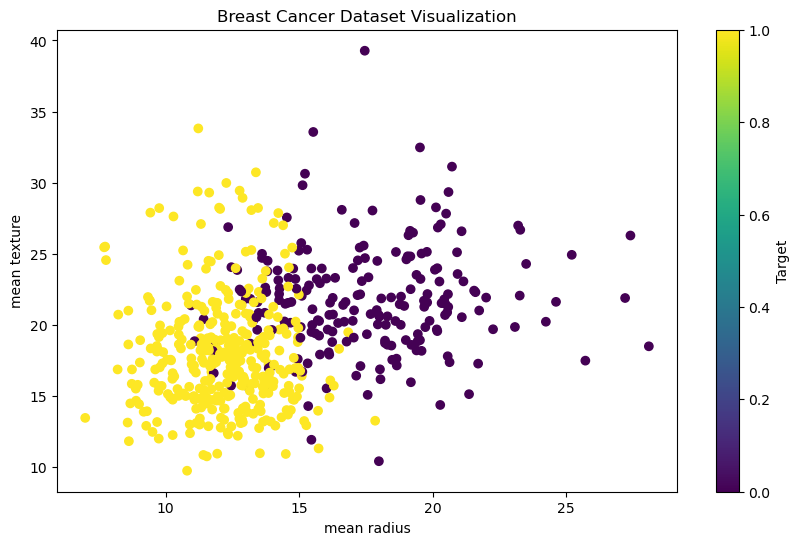

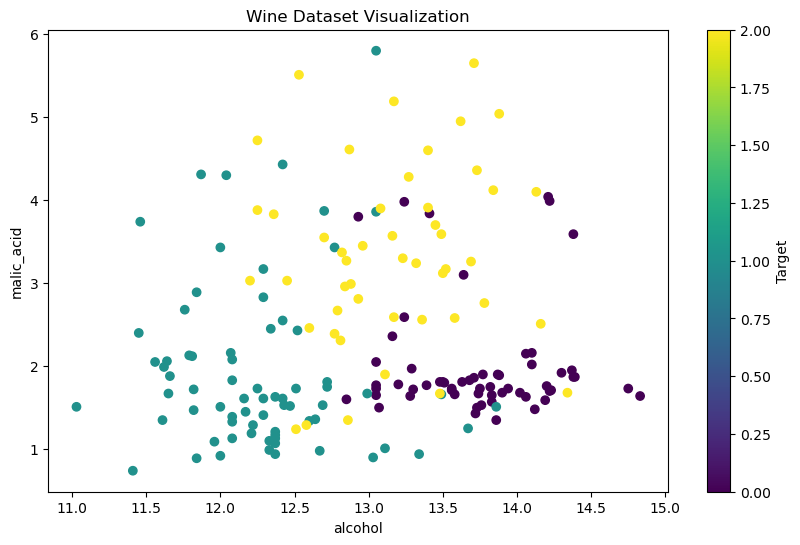

In [3]:
#Task 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
cancer = datasets.load_breast_cancer()
wine = datasets.load_wine()
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    cancer.data, cancer.target, test_size=0.25, random_state=42
)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    wine.data, wine.target, test_size=0.25, random_state=42
)
knn_cancer = KNeighborsClassifier(n_neighbors=3)
knn_cancer.fit(X_train_cancer, y_train_cancer)
print("Breast Cancer Dataset Accuracy:", knn_cancer.score(X_test_cancer, y_test_cancer))

knn_wine = KNeighborsClassifier(n_neighbors=3)
knn_wine.fit(X_train_wine, y_train_wine)
print("Wine Dataset Accuracy:", knn_wine.score(X_test_wine, y_test_wine))
plt.figure(figsize=(10, 6))
plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c=cancer.target, cmap='viridis')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("Breast Cancer Dataset Visualization")
plt.colorbar(label='Target')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target, cmap='viridis')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Wine Dataset Visualization")
plt.colorbar(label='Target')
plt.show()

In [19]:
#Task 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
def extract_numeric_price(price_str):
    try:
        return float(price_str.split()[1])  
    except:
        return np.nan 
hr_data = pd.read_excel("hr_dataset.xlsx")
boat_data = pd.read_csv("boat_dataset.csv")
iris_data = pd.read_csv("iris.data", header=None)
label_encoder = LabelEncoder()
hr_data_encoded = hr_data.copy()
for col in hr_data_encoded.columns:
    if hr_data_encoded[col].dtype == 'object':
        hr_data_encoded[col] = label_encoder.fit_transform(hr_data_encoded[col])
boat_data_encoded = boat_data.copy()
for col in boat_data_encoded.columns:
    if boat_data_encoded[col].dtype == 'object':
        boat_data_encoded[col] = label_encoder.fit_transform(boat_data_encoded[col])
X_hr = hr_data_encoded.drop('left', axis=1)  
y_hr = hr_data_encoded['left']  
X_hr_train, X_hr_test, y_hr_train, y_hr_test = train_test_split(X_hr, y_hr, test_size=0.2, random_state=42)
X_boat = boat_data_encoded.drop('Price', axis=1)  
y_boat = boat_data_encoded['Price']  
X_boat_train, X_boat_test, y_boat_train, y_boat_test = train_test_split(X_boat, y_boat, test_size=0.2, random_state=42)
X_iris = iris_data.iloc[:, :-1]  
y_iris = iris_data.iloc[:, -1]  
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_boat_train_imputed = imputer.fit_transform(X_boat_train)
X_boat_test_imputed = imputer.transform(X_boat_test)
knn_boat = KNeighborsClassifier(n_neighbors=3)
knn_boat.fit(X_boat_train_imputed, y_boat_train)
boat_accuracy = knn_boat.score(X_boat_test_imputed, y_boat_test)
print("Boat dataset accuracy:", boat_accuracy)
knn_hr = KNeighborsClassifier(n_neighbors=3)
knn_hr.fit(X_hr_train, y_hr_train)
hr_accuracy = knn_hr.score(X_hr_test, y_hr_test)
print("HR dataset accuracy:", hr_accuracy)
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_iris_train, y_iris_train)
iris_accuracy = knn_iris.score(X_iris_test, y_iris_test)
print("Iris dataset accuracy:", iris_accuracy)
plt.figure(figsize=(10, 6))
plt.scatter(hr_data['satisfaction_level'], hr_data['last_evaluation'], c=hr_data['left'], cmap='viridis')
plt.title('HR Dataset')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.colorbar(label='Left')
plt.show()
boat_data['Numeric Price'] = boat_data['Price'].apply(extract_numeric_price)
plt.figure(figsize=(10, 6))
plt.scatter(boat_data['Length'], boat_data['Width'], c=boat_data['Numeric Price'], cmap='viridis')
plt.title('Boat Dataset')
plt.xlabel('Length')
plt.ylabel('Width')
plt.colorbar(label='Price')
plt.show()
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data.columns = column_names
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['Numeric Species'] = iris_data['species'].map(species_map)
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['Numeric Species'] = iris_data['species'].map(species_map)
plt.figure(figsize=(10, 6))
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=iris_data['Numeric Species'], cmap='viridis')
plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Species')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'hr_dataset.xlsx'

In [18]:
#Task 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n} neighbors: {accuracy:.4f}")


Accuracy with 1 neighbors: 0.5062
Accuracy with 2 neighbors: 0.4406
Accuracy with 3 neighbors: 0.4531
Accuracy with 4 neighbors: 0.4406
Accuracy with 5 neighbors: 0.4562
Accuracy with 6 neighbors: 0.4750
Accuracy with 7 neighbors: 0.4625
Accuracy with 8 neighbors: 0.4938
Accuracy with 9 neighbors: 0.4781
Accuracy with 10 neighbors: 0.4813
